# Exploratory Data Analaysis

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import os, shutil
from glob import glob

In [2]:
# directory for dataset
path = "/Users/crystalhuang/Documents/GitHub/deep_learning_project/Face Mask Dataset"

In [3]:
# Create df for dataset
dataset = {"image_path":[], "mask_status":[], "where":[]}
for where in os.listdir(path):
    if where != '.DS_Store':
        for status in os.listdir(path+"/"+where):
            if status != '.DS_Store':
                for image in glob(path+"/"+where+"/"+status+"/"+"*.png"):
                    dataset["image_path"].append(image)
                    dataset["mask_status"].append(status)
                    dataset["where"].append(where)
dataset=pd.DataFrame(dataset)
dataset

,image_path,mask_status,where
0,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithoutMask,Test
1,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithoutMask,Test
2,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithoutMask,Test
3,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithoutMask,Test
4,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithoutMask,Test
...,...,...,...
11787,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithMask,Validation
11788,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithMask,Validation
11789,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithMask,Validation
11790,/Users/crystalhuang/Documents/GitHub/deep_lear...,WithMask,Validation


In [4]:
# save df
dataset.to_csv("dataset.csv")

In [5]:
# target distribution check
mask = dataset.value_counts("mask_status")[1]
withoutmask = dataset.value_counts("mask_status")[0]

print(f"With Mask: {mask} \nWithout Mask: {withoutmask}\n")

With Mask: 5883 
Without Mask: 5909



/Users/crystalhuang/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


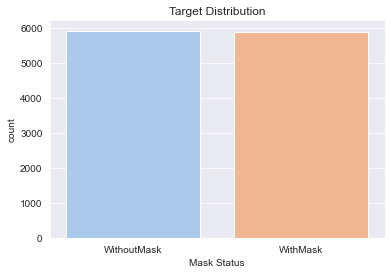

In [6]:
# plotting distribution
sns.countplot(dataset["mask_status"],palette='pastel')
plt.title('Target Distribution')
plt.xlabel('Mask Status')
plt.show()

With Mask
(84, 84, 3)


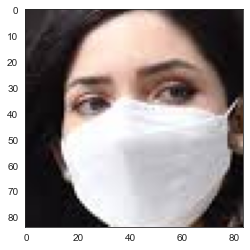

In [8]:
import cv2
sns.set_style("white")
#check on shape of images
mask = cv2.imread('Face Mask Dataset/Train/WithMask/9.png')
mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)

print('With Mask')
print(mask.shape)
plt.imshow(mask);


Without Mask
(111, 111, 3)


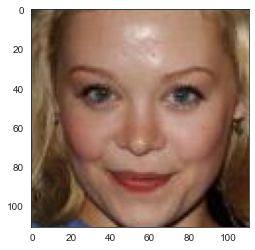

In [9]:
nomask = cv2.imread('Face Mask Dataset/Train/WithoutMask/9.png')
nomask = cv2.cvtColor(nomask,cv2.COLOR_BGR2RGB)

print('Without Mask')
print(nomask.shape)
plt.imshow(nomask);

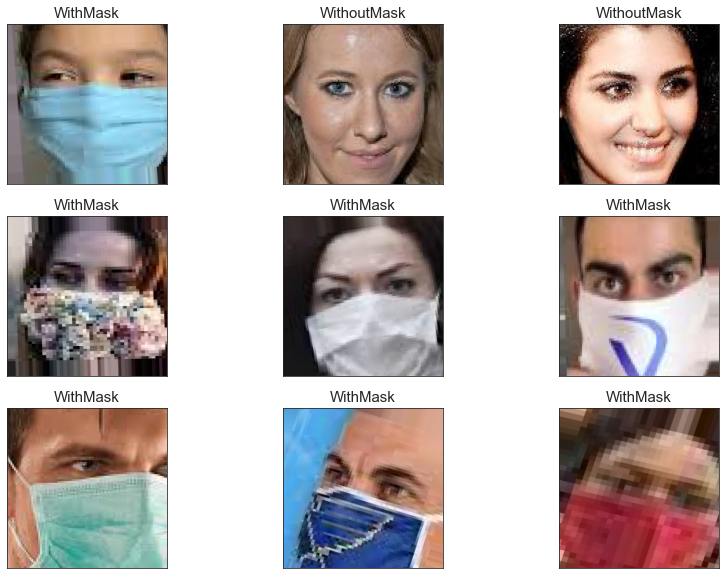

In [10]:
# check images
import cv2
plt.figure(figsize = (14,10))
for i in range(9):
    random = np.random.randint(1,len(dataset))
    pic=cv2.imread(dataset.loc[random,"image_path"])
    pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(pic)
    plt.title(dataset.loc[random, "mask_status"], size = 15) 
    plt.xticks([])
    plt.yticks([])
    
plt.show()